## Fourier transform shift of a geometric progression

If we are given the following geometric progression function:
\begin{equation}
y(k) = R^{-k}
\end{equation}


0
0
0
0
0
0
0
0
0
0
0
0
0
None


TypeError: unsupported operand type(s) for *: 'complex' and 'NoneType'

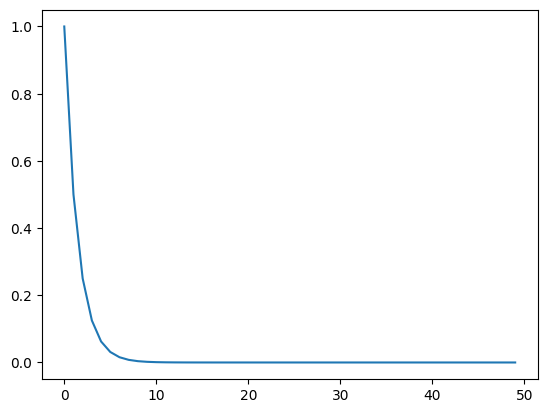

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math

R = 2

fig, ax = plt.subplots()

def wavenum(i) : return (i + N // 2) % N - N // 2

def y_l(A):
    out = np.zeros(len(A))
    for i in range(0, len(A)):
        out[i] = R**-A[i]
    return out


def g(k, N):
    return np.exp(-2j * np.pi * k / N) * R**-1


def low_pass_filter(w_n):
    if np.abs(w_n) < N/4:
        return 0
    

N = 50
y = np.arange(N, dtype='float')

y_l_y = y_l(y)

# Plot original function
ax.plot(y,y_l_y)

# Calculate Fourier transform of the Geometric progression function: y(k) = 2^-k
G = np.zeros(N, dtype=complex)
for i in range(0,N):
    G[i] = (1 - g(i,N)**N) / (1 - g(i,N))
    
delta = 20.3

# Multiply the frequency values by a phase shift of delta
N_prime = N if N % 2 == 0 else N+1
for k in range(0,int(N_prime/2)):
    k = wavenum(k)
    k = low_pass_filter(k)
    print(k)
    G[k] = np.exp(-2j * np.pi * delta * k / N) * G[k]
for k in range(int(N_prime/2), N):
    k = wavenum(k)
    k = low_pass_filter(k)
    print(k)
    G[k] = np.exp(-2j * np.pi * delta * k / N) * G[k]
    
for k in range(0,N):
    if N % 2 == 0 and k == N/2:
        k = wavenum(k)
        k = low_pass_filter(k)
        ambiguous = np.exp(-2j * k / N * np.pi * delta)
        G[k] = 0.5 * (ambiguous + 1/ambiguous)
# out_inverse = np.exp(-2j * wavenum(y) / N * np.pi * delta)


# if N & 1:
#     idx0, idx1 = N//2, 1 + N//2
#     #ambiguous = np.exp(-2j * (n - 1) / n * np.pi * delta)
#     # print("wavenums", wavenum(idx0), wavenum(idx1))
#     # print("H:", H[idx0], H[idx1])
# else :
#     idx0 = N//2
#     ambiguous = np.exp(-2j * (N//2) / N * np.pi * delta)
#     # print("H:", H[idx0], ambiguous)
#     out_inverse[idx0] = 0.5 * (ambiguous + 1/ambiguous)
#     # print("new H:", H[idx0])
    
# out_inverse = np.fft.ifft(out_inverse * G)


out_inverse = np.zeros(N, dtype=complex)
ax.plot(y, out_inverse.real)

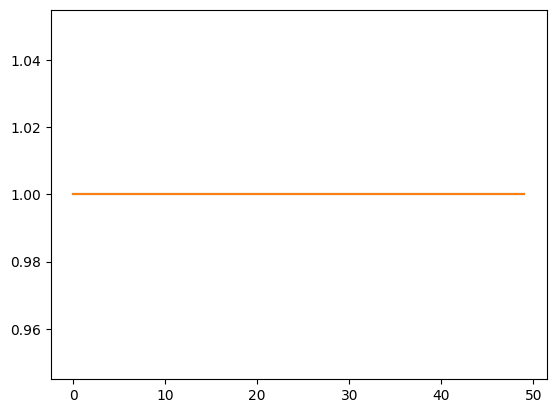

In [ ]:
# Square wave
import math

N = 50

x = np.linspace(0, 10, N)
y = np.array([1 if math.floor(2 * t) % 2 == 0 else 0 for t in x])


fig, ax = plt.subplots()

# Plot original function
ax.plot(x,y ,drawstyle='steps-pre')

# Calculate Fourier transform of the Geometric progression function: y(k) = 2^-k
G = np.zeros(N, dtype=complex)
G = np.fft.fft(y)

delta = 3

# Multiply the frequency values by a phase shift of delta
N_prime = N if N % 2 == 0 else N+1
for k in range(0,int(N_prime/2)):
    G[k] = np.exp(-2j * np.pi * delta * k / N) * G[k]
for k in range(int(N_prime/2), N):
    G[k] = np.exp(-2j * np.pi * delta * (k - N) / N) * G[k]
    
for k in range(0,N):
    if N % 2 == 0 and k == N/2:
        G[k] = np.exp(1j*np.pi * (delta % 1)) * G[k]
    else:
        G[k] = G[k] 

    
    
out_inverse = np.zeros(N, dtype=complex)
out_inverse = np.fft.ifft(G)
ax.plot(x, out_inverse.real, drawstyle='steps-pre')


fs:  3.8981718325193755e-17 3.8981718325193755e-17


/var/folders/1s/rksq8jbd5fz1bfhyqbh4w64c0000gn/T/ipykernel_19912/3422560638.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  L_2[i] = (-a * np.sin(a))/((a ** 2) - (np.pi**2)) + 1/2


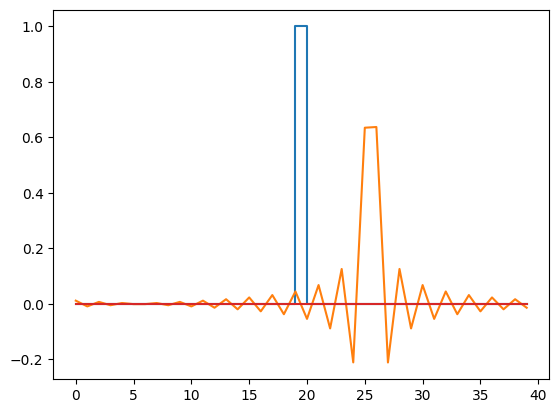

In [75]:
# Bomba function
def f(A):
    out = np.zeros(len(A))
    for i in range(0, len(A)):
        if i == len(A)/2:
            out[i] = 1
        elif len(A) % 2 != 0:
            out[len(A)//2] = 1
    return out

N = 40
y = np.arange(N)
# y = y[0:N]
f_y = f(y)

fig, ax = plt.subplots()

# Plot original function
ax.plot(y,f_y, drawstyle='steps-pre')

G = np.zeros(N, dtype=complex)
G = np.fft.fft(f_y)

delta = 5.501

##########################
# Lanczos smoothing

L = np.ones(N)

for i in range(N):
    k = wavenum(i)
    a = np.pi / N  * k  * 2
    if k:
        e = (np.sin(a) / a)
        L[i] =  e
    if k == -N//2:
        print("fs: ", L[i], np.sin(-a)/-a)
###########################



##########################
# Better Lnaczos Smoothing

L_2 = np.ones(N, dtype=complex)
for i in range(N):
    k = wavenum(i)
    a = np.pi / N * k * 2
    if k:
        L_2[i] = (-a * np.sin(a))/((a ** 2) - (np.pi**2)) + 1/2

        

# Multiply the frequency values by a phase shift of delta
N_prime = N if N % 2 == 0 else N+1
for k in range(0,int(N_prime/2)):
    G[k] = np.exp(-2j * np.pi * delta * k / N) * G[k]
for k in range(int(N_prime/2), N):
    G[k] = np.exp(-2j * np.pi * delta * (k - N) / N) * G[k]
    
for k in range(0,N):
    if N % 2 == 0 and k == N/2:
        ambiguous = np.exp(-2j * k / N * np.pi * delta)
        G[k] = 0.5 * (ambiguous + 1/ambiguous)


out_shifted = np.zeros(N, dtype=complex)
out_shifted = np.fft.ifft(G)


out_smoother = np.zeros(N, dtype=complex)
out_smoother = G * L
out_smoother = np.fft.ifft(out_smoother)

out_smoother_smoother = np.zeros(N, dtype=complex)
out_smoother = G * L_2
out_smoother = np.fft.ifft(out_smoother)


ax.plot(y, out_shifted.real)
ax.plot(y, out_smoother.real)
ax.plot(y, out_smoother_smoother.real)


[ 6.32827124e-15+0.00000000e+00j -7.40141168e-01+1.17642070e+01j
  2.39882647e+00-1.89886668e+01j  1.34361597e+00-7.04348156e+00j
  1.16436989e+00-4.53492132e+00j  1.09667144e+00-3.37520763e+00j
  1.06311329e+00-2.68511767e+00j  1.04387154e+00-2.21833994e+00j
  1.03177012e+00-1.87678288e+00j  1.02365376e+00-1.61302023e+00j
  1.01794637e+00-1.40108298e+00j  1.01378552e+00-1.22545618e+00j
  1.01066577e+00-1.07624973e+00j  1.00827450e+00-9.46832774e-01j
  1.00640981e+00-8.32574602e-01j  1.00493667e+00-7.30129232e-01j
  1.00376211e+00-6.37006803e-01j  1.00282056e+00-5.51305266e-01j
  1.00206494e+00-4.71535968e-01j  1.00146097e+00-3.96506446e-01j
  1.00098345e+00-3.25239239e-01j  1.00061388e+00-2.56913978e-01j
  1.00033876e+00-1.90824825e-01j  1.00014854e+00-1.26348144e-01j
  1.00003684e+00-6.29169849e-02j  1.00000000e+00-2.22044605e-16j
  1.00003684e+00+6.29169849e-02j  1.00014854e+00+1.26348144e-01j
  1.00033876e+00+1.90824825e-01j  1.00061388e+00+2.56913978e-01j
  1.00098345e+00+3.252392

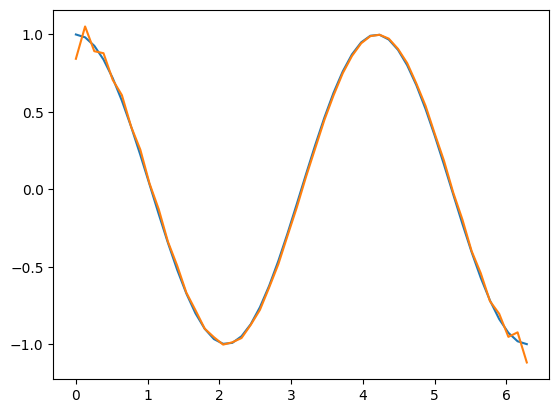

In [ ]:

N = 50
y = np.linspace(0,2 * np.pi, N)

# y = y[0:N]
# print(y)
# print(y)

f_y = np.cos(y * 3/2)

fig, ax = plt.subplots()

# Plot original function
ax.plot(y,f_y)

G = np.zeros(N, dtype=complex)
G = np.fft.fft(f_y)

print(G)

# print(G)
    

# def wave_num(i):
#     return (i + math.floor(N/2))%N - math.floor(N/2)

delta = 0.1

# Multiply the frequency values by a phase shift of delta
N_prime = N if N % 2 == 0 else N+1
for k in range(0,int(N_prime/2)):
    G[k] = np.exp(-2j * np.pi * delta * k / N) * G[k]
for k in range(int(N_prime/2), N):
    G[k] = np.exp(-2j * np.pi * delta * (k - N) / N) * G[k]


for k in range(0,N):
    if N % 2 == 0 and k == N/2:
        G[k] = np.exp(1j*np.pi * (delta % 1)) * G[k]
    else:
        G[k] = G[k] 
        
print(delta % 1)
    
out_inverse = np.zeros(N, dtype=complex)
# Implement my own inverse fourier
# for m in range(0,N):
#     for k in range(0,N):
#         e = np.exp(2j * np.pi * k * m/ N)
#         out_inverse[m] += G[k] * e
        
#     out_inverse[m] = out_inverse[m] / N
# out_inverse/= N

# for n in range(0,N):
#     out = 0
#     for k in range(1, int(N_prime/2)):
#         e = (np.exp(2j * np.pi * n * k / N) * G[k] + np.exp(2j * np.pi * n * k /N) * G[k])
#         out += e + 1 /N * G[0] + 1/N * np.exp(1j * np.pi * n) * G[int(-N/2)]
        
#     out_inverse[n] = out

# out_inverse /= N

# print(G)
# print(G)
out_inverse = np.fft.ifft(G)
# print(out_inverse)


def wavenum(X): return 

# print(new_g)
# final_output = np.fft.ifft(new_g)
# print(final_output)
ax.plot(y, out_inverse.real)

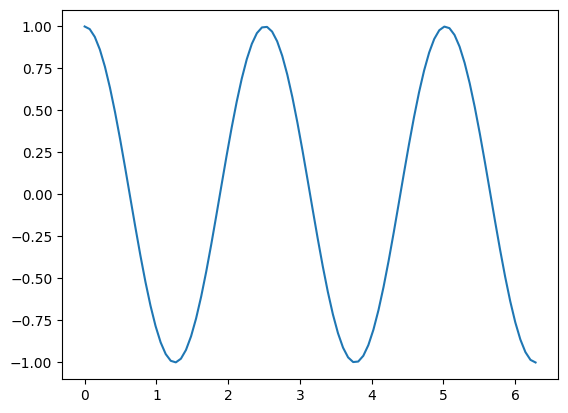

In [ ]:
N = 90
y = np.linspace(0,2 * np.pi, N)
# y = y[0:N]
# print(y)
f_y = np.cos(y * 5/2)

fig, ax = plt.subplots()

# Plot original function
ax.plot(y,f_y)

G = np.zeros(N, dtype=complex)
G = np.fft.fft(f_y)

# print(G)
    

def wave_num(i):
    return (i + math.floor(N/2))%N - math.floor(N/2)

delta = 30


# for i in range(0,N):
    